In [173]:
candidate_sentences = """
The value chain for any given consumer market is divided into three parts: suppliers, distributors, and consumers/users. The best way to make outsize profits in any of these markets is to either gain a horizontal monopoly in one of the three parts or to integrate two of the parts such that you have a competitive advantage in delivering a vertical solution. In the pre-Internet era the latter depended on controlling distribution.
For example, printed newspapers were the primary means of delivering content to consumers in a given geographic region, so newspapers integrated backwards into content creation (i.e. supplier) and earned outsized profits through the delivery of advertising. A similar dynamic existed in all kinds of industries, such as book publishers (distribution capabilities integrated with control of authors), video (broadcast availability integrated with purchasing content), taxis (dispatch capabilities integrated with medallions and car ownership), hotels (brand trust integrated with vacant rooms), and more. Note how the distributors in all of these industries integrated backwards into supply: there have always been far more users/consumers than suppliers, which means that in a world where transactions are costly owning the supplier relationship provides significantly more leverage.
The fundamental disruption of the Internet has been to turn this dynamic on its head. First, the Internet has made distribution (of digital goods) free, neutralizing the advantage that pre-Internet distributors leveraged to integrate with suppliers. Secondly, the Internet has made transaction costs zero, making it viable for a distributor to integrate forward with end users/consumers at scale.
This has fundamentally changed the plane of competition: no longer do distributors compete based upon exclusive supplier relationships, with consumers/users an afterthought. Instead, suppliers can be commoditized leaving consumers/users as a first order priority. By extension, this means that the most important factor determining success is the user experience: the best distributors/aggregators/market-makers win by providing the best experience, which earns them the most consumers/users, which attracts the most suppliers, which enhances the user experience in a virtuous cycle.
The result is the shift in value predicted by the Conservation of Attractive Profits. Previous incumbents, such as newspapers, book publishers, networks, taxi companies, and hoteliers, all of whom integrated backwards, lose value in favor of aggregators who aggregate modularized suppliers — which they often don’t pay for — to consumers/users with whom they have an exclusive relationship at scale. For example:
Previously, publishers integrated publications and articles. Google modularized individual pages and articles, making them directly accessible via search
Google integrated search results with search and profile data about users, enabling it to sell highly effective advertising
Previously, publishers integrated content and advertisements. Facebook modularized advertisements by allowing advertisers to target customers directly, not via proxy
Facebook integrated News feed ad inventory and profile data, enabling it to sell highly effective advertising
Previously, book publishers integrated editing, marketing and distribution. Amazon modularized distribution first via e-commerce and then via e-books
Amazon integrated customer data and payment information with e-book distribution and its Amazon publishing initiative (the framework is clearest when it comes to books, but the integration of distribution and the customer relationship also applies to most of Amazon’s business)
Netflix.
Previously, networks integrated broadcast availability and content purchases. Netflix modularized broadcast availability by making its entire library available at any time in any order
Netflix integrated content purchases and customer management, enabling a virtuous cycle of increased subscription demand and increased content purchase capability
Snapchat.
Previously, networks integrated mass-market advertising and general interest programming. Snapchat (and many other services) modularized attention
Snapchat is integrating individually interesting content with mass market advertising inventory, giving brand advertisers a new way to reach a large audience efficiently
Uber.
Previously, taxi companies integrated dispatch and fleet management. Uber modularized fleet management by working with independent drivers
Uber is integrating dispatch with customer management, enabling it to scale worldwide
Airbnb.
Previously, hotels integrated vacant rooms and trust (via brand). Airbnb modularized vacant properties by building a reputation system for trust between hosts and guests
Airbnb is integrating property management and customer management, enabling it to scale worldwide
It’s interesting to consider the order of these examples: the pioneer of this model was Google which modularized content providers. It’s easy to see why this is the case: content has always been monetized by proxy, whether it be paying for newspapers (or advertising space in those newspapers), paying for CDs, or paying for cable TV. The shift to digital has exposed these proxies for the rent-collection mechanisms they are.
Facebook, though, has built in some respects an even stronger position: its suppliers are its users, so while it, like Google, aggregates content that it gets for free, it also has exclusive access to that content. Snapchat and other user-generated content networks are similar.
The third wave are industries that don’t have such an obvious digital component. Airbnb, for example, deals with vacant rooms; what makes it work is the way it has digitized — and thus commoditized — trust. Uber deals with cars; it has digitized both trust and dispatch. More importantly, both have nailed the user experience in a way that incumbents have been sorely lacking. Both companies also sit in a sort of middle ground between Facebook and Google: their suppliers are not exclusive in theory, but increasingly are exclusive in reality as both benefit from a virtuous cycle of more users leading to increased utilization of suppliers.
What is important to note is that in all of these examples there are strong winner-take-all effects. All of the examples I listed are not only capable of serving all consumers/users, but they also become better services the more consumers/users they serve — and they are all capable of serving every consumer/user on earth. This, above all else, is why consumer technology companies are so highly valued both in the public and private markets.
Looking forward, I believe that Aggregation Theory will be the proper framework to both understand opportunities for startups as well as threats for incumbents:
What is the critical differentiator for incumbents, and can some aspect of that differentiator be digitized?
If that differentiator is digitized, competition shifts to the user experience, which gives a significant advantage to new entrants built around the proper incentives
Companies that win the user experience can generate a virtuous cycle where their ownership of consumers/users attracts suppliers which improves the user experience
The Uber and Airbnb examples are especially important: vacant rooms and taxis have not been digitized, but they have been disrupted. I suspect that nearly every industry will belatedly discover it has a critical function that can be digitized and commodified, precipitating this shift. The profound changes caused by the Internet are only just beginning; aggregation theory is the means.
"""

In [ ]:
candidate_sentences = candidate_sentences.replace("  ",' ')

In [174]:
# candidate_sentences = """
# Treloar was born in Port Melbourne, Victoria, on 10 December 1894.
# His father was a sales representative for Carlton & United Breweries and his mother was a strict Methodist. 
# Treloar was educated at Albert Park State School and became a trained Sunday school teacher.
# He was not able to attend university, but sought self-education in Melbourne's museums and libraries.
# Treloar also participated in his school's cadet unit, and believed that the military offered a means to follow his ambition for a career in a field other than small business.
# He was also a capable footballer, cricket player, and athlete and was invited to train with the South Melbourne Football Club. 
# He took his father's advice to wait until he was 21 before playing senior games, however, and instead took a job with the Department of Defence after he left school in 1911. 
# In this position he worked as a clerk for Brudenell White, who was later a leading Australian staff officer of World War I and the commander of the Australian Army during the early months of World War II."""

In [175]:
from utils import *
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
%matplotlib inline
ACCEPTED_TAGS = {'NN', 'NNS', 'NNP', 'JJ'}
def is_good_token(tagged_token):
    return is_word(tagged_token[0]) and tagged_token[1] in ACCEPTED_TAGS
# Now let's build the graph.
import networkx
graph = networkx.Graph()
tokens = nltk.word_tokenize(candidate_sentences)
tagged_tokens = nltk.pos_tag(tokens)
bigrams = nltk.ngrams(tagged_tokens, 2)
for bg in bigrams:
    if all(is_good_token(t) for t in bg):
        normalized = [t[0] for t in bg]
        graph.add_edge(*normalized)
        
pagerank = networkx.pagerank(graph)
ranked = sorted(pagerank.items(), key=lambda ns_pair: ns_pair[1], reverse=True)
words = [i[0] for i in ranked]
score = [i[1] for i in ranked]
score_table = pd.DataFrame({'word':words, 'score':score})
stopset = list(find_punct(candidate_sentences)) 

In [176]:
entity_pairs = []
sent = sent_tokenize(candidate_sentences)
for i in tqdm(sent):
    i = cleanup(i,stopset)
    entity_pairs.append(get_entities(i))

100%|██████████| 43/43 [00:00<00:00, 91.90it/s]


In [177]:
relations = [get_relation(i) for i in sent]
source = [i[0] for i in entity_pairs]
target = [i[1] for i in entity_pairs]
source_result, source_score = get_score_source(source,score_table)
target_result, target_score = get_score_target(target,score_table)

In [178]:
df = pd.DataFrame({'source':source_result, 'target':target_result, 'edge':relations, 
                      'source_score':source_score, 'target_score':target_score})
df = df[~df['edge'].isin(stop)]
kg_df = df[(df['source_score'] > 0)&(df['target_score'] >= 0.001)]
keyword = df.drop_duplicates(subset = 'source').sort_values('source_score', ascending = False)

In [179]:
df['source'].value_counts()

                                     3
Previously book publishers           1
they                                 1
which                                1
most which                           1
individual them                      1
rent collection they                 1
Internet latter                      1
critical that                        1
Instead suppliers                    1
always it                            1
user incumbents                      1
often don they                       1
mass market advertising inventory    1
Internet distributors                1
Previously hotels                    1
value chain                          1
geographic newspapers                1
Previously taxi companies            1
Uber it                              1
similar dynamic                      1
distributor                          1
independent fleet Uber               1
entire broadcast library             1
Previously networks                  1
Name: source, dtype: int6

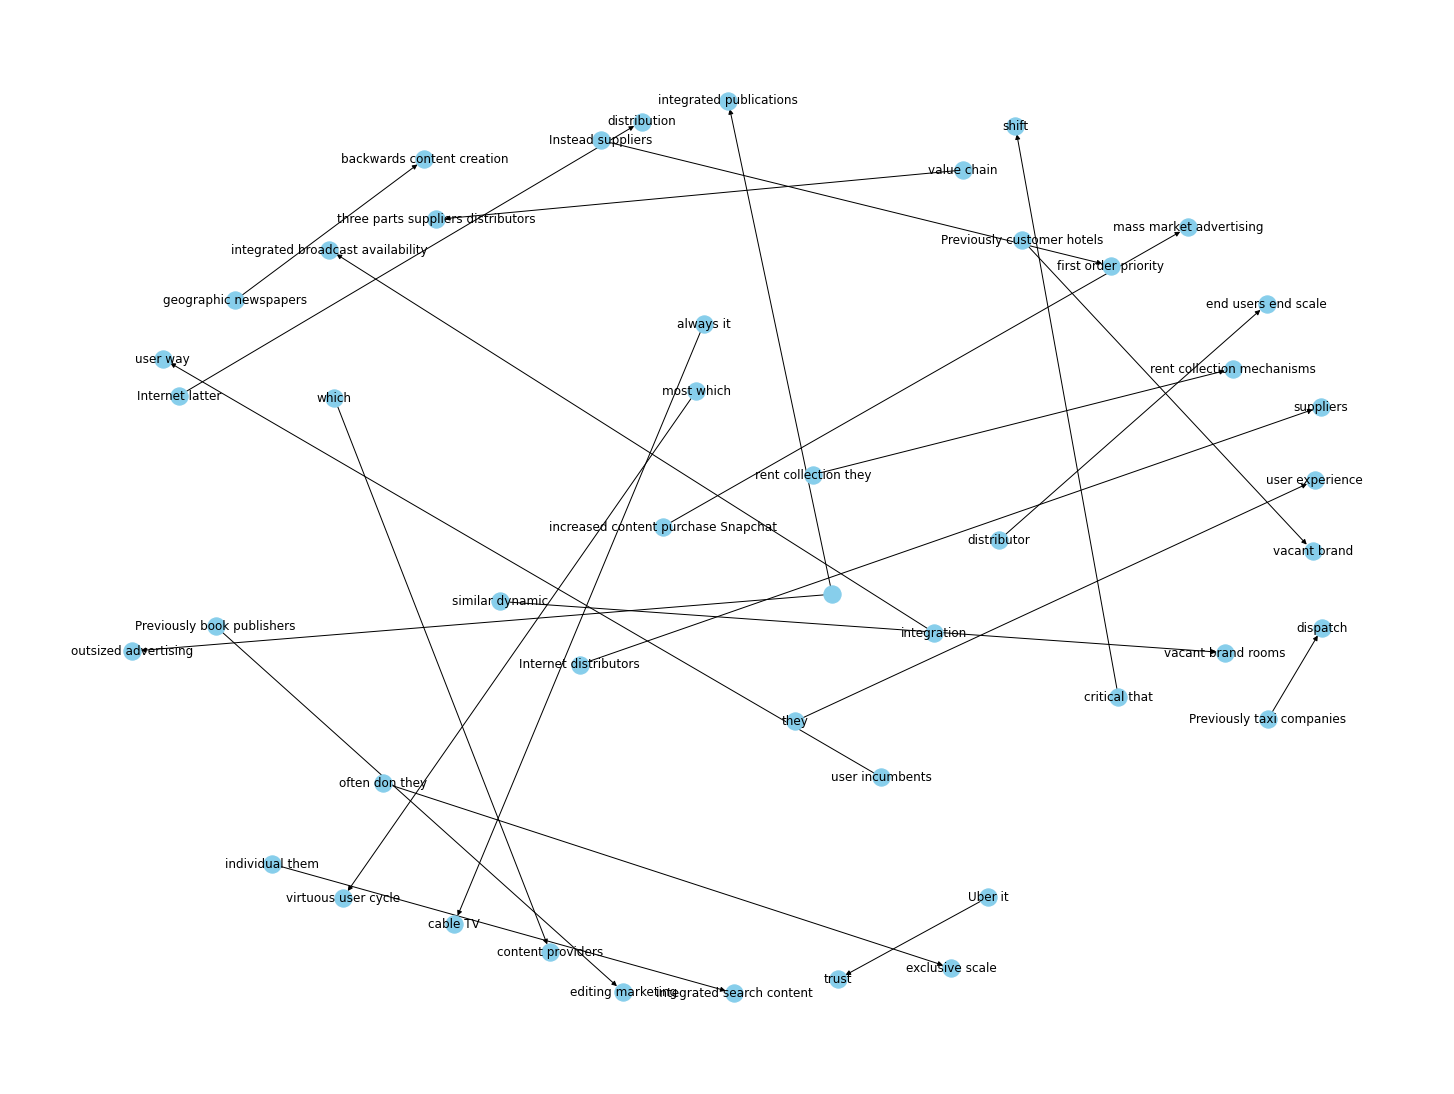

In [161]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(df,"source",  "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(20,15))
pos = nx.spring_layout(G, k = 1)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [160]:
# G=nx.from_pandas_edgelist(df[df['edge'].str.contains('subject|serve|used|utilized|shown|proven|intersect|identifies')], "source", "target", 
#                           edge_attr=True, create_using=nx.MultiDiGraph())
# # 
# plt.figure(figsize=(10,12))
# pos = nx.spring_layout(G, k = 0.3) # k regulates the distance between nodes
# nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()

### Summary:
- Nhận biết dược keyword và các mối liên hệ với nhau. Thử với bộ dữ liệu wikipedia. Nhờ áp dụng stemming nên ít xuất hiện các từ giống nhau, sử dụng score cho từng cặp từ, có thể chọn làm threshold.
- Text đầu vào cần dược clean các ký tự, 